In [1]:
# go wide screen
from IPython.core.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))

In [2]:
from astropy.table import Table, vstack, Column
import glob
import os

import numpy as np

In [3]:
from matplotlib import pyplot as plt

In [4]:

# check scikit-learn version
import sklearn
print(sklearn.__version__)


0.19.2


In [5]:
%matplotlib inline
#%matplotlib notebook

In [6]:
t = Table.read("../augm_gama09EFGHfin_2.0.cat", format="ascii.ecsv")
# filter out nans
t = t[ ~np.isnan(t['psfit_rchisq']) ]
t = t[ ~t['touches_nan'] ]
t = t[ ~t['touches_edge'] ]

In [7]:
# create array that select alls sources that have manually me vetted as proper emission lines
mv = Table.read("../gama09G_H_vetted.csv")

kk = t['id'] < -1 # all false array
for r in mv:
    if r['EL' ] == 1:
        #print('EL')
        field, ifu, id = r['field' ], '{:03d}'.format(int(r['ifu' ])), int(r['id' ])
        ll  = t['field'] == field
        ll *= t['ifu'] == ifu
        ll *= t['id']  == id
        #print(field, ifu, id, np.sum(ll))
        kk += ll

In [8]:
# create array that select alls sources that have manually me vetted as proper emission lines
mv2 = Table.read("../gama09E_F_vetted.csv")

#kk = t['id'] < -1 # all false array
for r in mv2:
    if r['EL' ] == 1:
        try:
            field, ifu, id = r['field_1' ], '{:03d}'.format(int(r['ifu_1' ])), int(r['id_1' ])
            ll  = t['field'] == field
            ll *= t['ifu'] == ifu
            ll *= t['id']  == id
            #print(field, ifu, id, np.sum(ll))
            kk += ll
        except:
            pass
        

In [9]:
sum(kk)

264

In [10]:
# only use columns with umerical values
numerical_cols = []
numerical_cols_names = []
for c in t.columns:
    if t.columns[c].dtype == float or t.columns[c].dtype == int:
        numerical_cols.append(list(t.columns[c]))
        numerical_cols_names.append(t.columns[c].name)
tn = np.array( numerical_cols, dtype='float32' ).T

tn[np.isnan(tn)] = 999
tn[tn == np.inf] = 999

numerical_cols_names = np.array(numerical_cols_names)

/Users/mxhf/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/feature_extraction/image.py:167: DeprecationWarning: `np.int` is a deprecated alias for the builtin `int`. To silence this warning, use `int` by itself. Doing this will not modify any behavior and is safe. When replacing `np.int`, you may wish to use e.g. `np.int64` or `np.int32` to specify the precision. If you wish to review your current use, check the release note link for additional information.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  dtype=np.int):
/Users/mxhf/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/sklearn/ensemble/weight_boosting.py:29: DeprecationWarning: numpy.core.umath_tests is an internal NumPy module and should not be imported. It will be removed in a future NumPy release.
  from numpy.core.umath_tests import inner1d
/Users/mxhf/.pyenv/versions/anaconda3-5.3.1/lib/python3.7/site-packages/skle

Feature: 0, Score: 0.01718
Feature: 1, Score: 0.21242
Feature: 2, Score: 0.04867
Feature: 3, Score: 0.00000
Feature: 4, Score: 0.01066
Feature: 5, Score: 0.01574
Feature: 6, Score: 0.00356
Feature: 7, Score: 0.00000
Feature: 8, Score: 0.00553
Feature: 9, Score: 0.00406
Feature: 10, Score: 0.00130
Feature: 11, Score: 0.01019
Feature: 12, Score: 0.02423
Feature: 13, Score: 0.00901
Feature: 14, Score: 0.01228
Feature: 15, Score: 0.00944
Feature: 16, Score: 0.04765
Feature: 17, Score: 0.00094
Feature: 18, Score: 0.00301
Feature: 19, Score: 0.00108
Feature: 20, Score: 0.00283
Feature: 21, Score: 0.00913
Feature: 22, Score: 0.00438
Feature: 23, Score: 0.00678
Feature: 24, Score: 0.00676
Feature: 25, Score: 0.00855
Feature: 26, Score: 0.00219
Feature: 27, Score: 0.00206
Feature: 28, Score: 0.03966
Feature: 29, Score: 0.00000
Feature: 30, Score: 0.00295
Feature: 31, Score: 0.00361
Feature: 32, Score: 0.00380
Feature: 33, Score: 0.00623
Feature: 34, Score: 0.01526
Feature: 35, Score: 0.00795
Fe

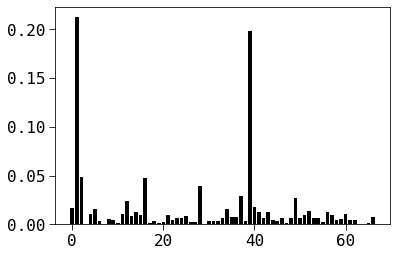

In [11]:
# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(tn, kk)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [12]:
# new
np.array(numerical_cols_names)[importance > 0.02]

array(['N', 'counts', 'dy', 'size2d', 'psfit_cnts', 'psfit_sigz',
       'psfit_dwl', 'match1_EQW_lya'], dtype='<U24')

In [13]:
# new
for i, imp in enumerate(importance[importance > 0.02]):
    print(numerical_cols_names[importance > 0.02][i], imp)

N 0.2124228952792059
counts 0.04867098039642484
dy 0.024232543475683554
size2d 0.047646448579855505
psfit_cnts 0.03966094410095662
psfit_sigz 0.0286797347434135
psfit_dwl 0.1984669936253335
match1_EQW_lya 0.026783204839987373


In [14]:
jj  = ~t["touches_nan"] 
jj *= ~t["touches_edge"] 

(0.1, 30.0)

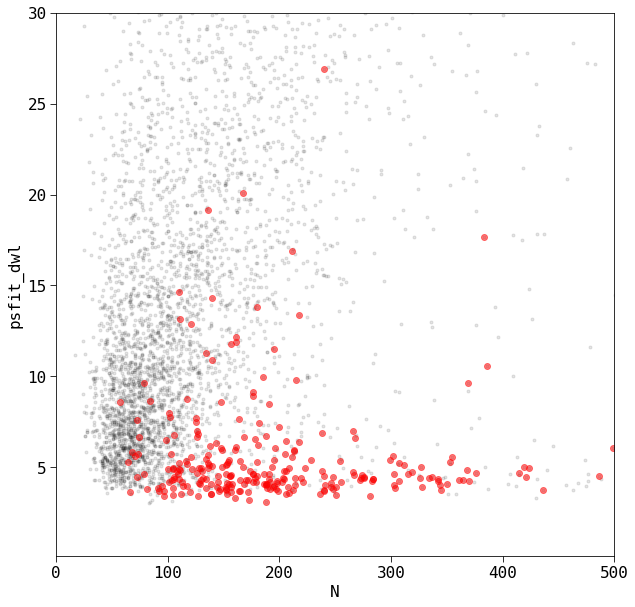

In [15]:
f = plt.figure(figsize=[10,10])
plt.plot(t["N"][jj], np.abs(t["psfit_dwl"][jj]),'.',alpha=.1)
plt.plot(t["N"][kk], np.abs(t["psfit_dwl"][kk]),'ro',alpha=.5)


plt.xlabel('N')
plt.ylabel('psfit_dwl')
plt.xlim([0.,500.])
plt.ylim([0.1,30.])

(0.1, 100.0)

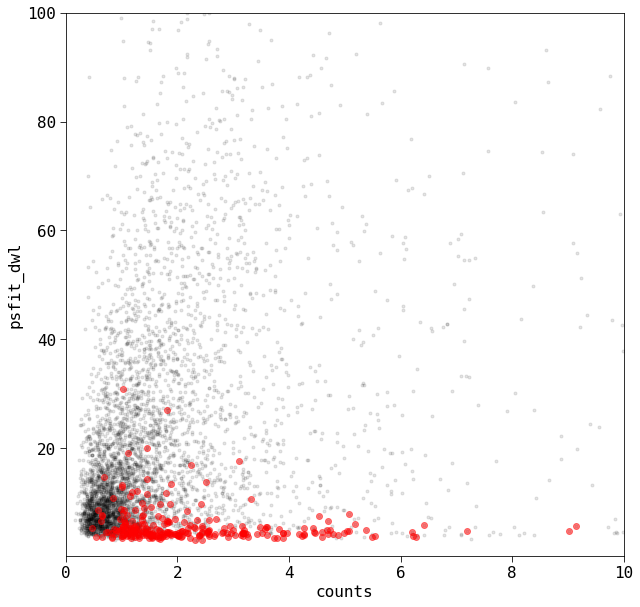

In [16]:
f = plt.figure(figsize=[10,10])
plt.plot(t["counts"][jj], np.abs(t["psfit_dwl"][jj]),'.',alpha=.1)
plt.plot(t["counts"][kk], np.abs(t["psfit_dwl"][kk]),'ro',alpha=.5)


plt.xlabel('counts')
plt.ylabel('psfit_dwl')
plt.xlim([0.,10.])
plt.ylim([0.1,100.])

In [17]:
xs = t["N"]
ys = np.abs(t["psfit_dwl"])
zs = t["size2d"]

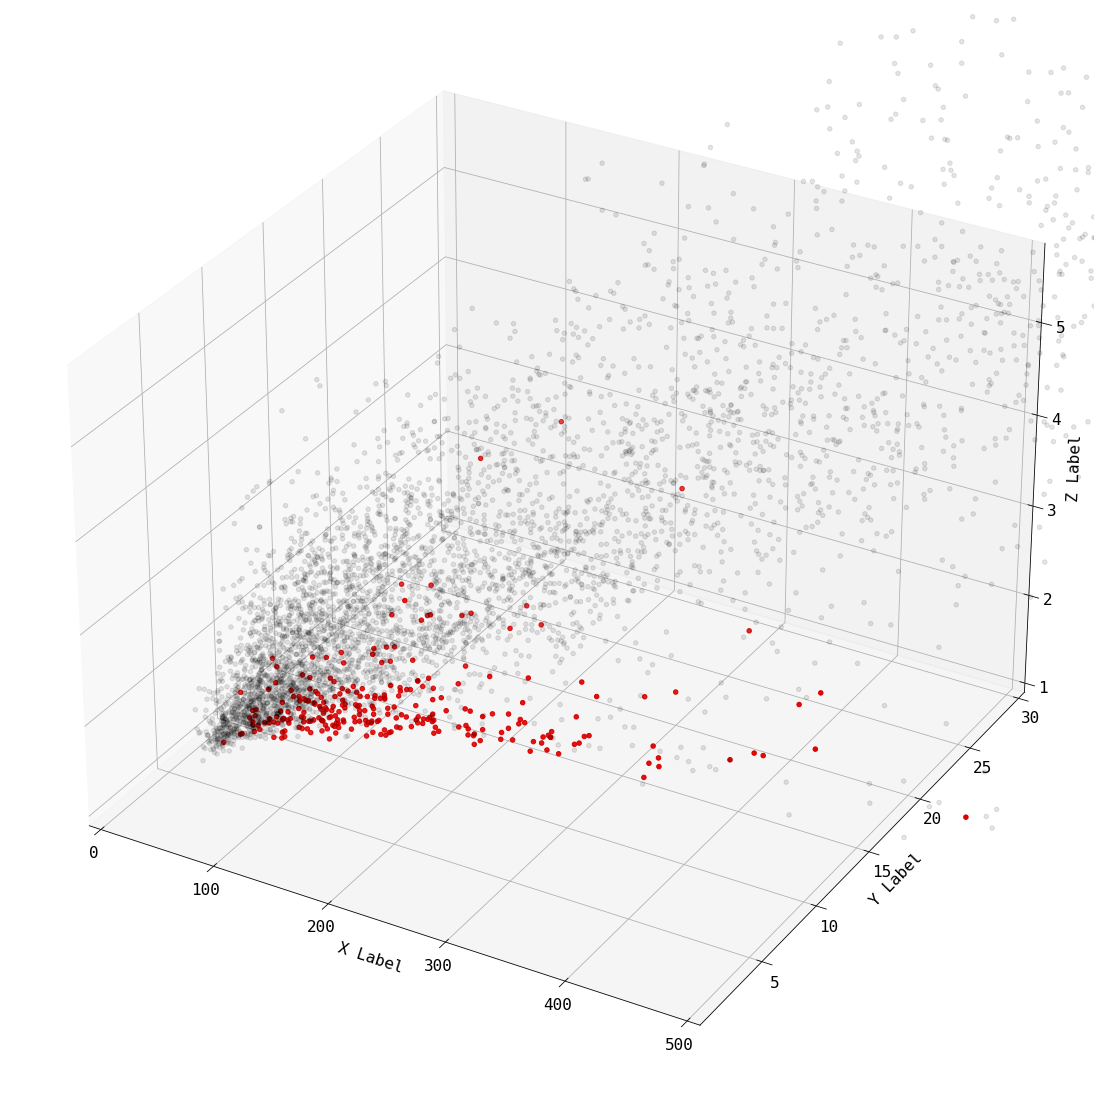

In [18]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Fixing random state for reproducibility
#np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot(projection='3d')

n = 100

## For each set of style and range settings, plot n random points in the box
### defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
#for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
#    xs = randrange(n, 23, 32)
#    ys = randrange(n, 0, 100)
#    zs = randrange(n, zlow, zhigh)
#    ax.scatter(xs, ys, zs, marker=m)


ax.scatter(xs[jj], ys[jj], zs[jj], alpha=.1)
ax.scatter(xs[kk], ys[kk], zs[kk], color='r')

ax.set_xlabel('X Label')
ax.set_ylabel('Y Label')
ax.set_zlabel('Z Label')

plt.xlim([0.,500.])
plt.ylim([0.1,1000.])
plt.ylim([0.1,30.])
plt.show()

In [69]:
from sklearn.decomposition import PCA

n_components = 3
pca = PCA(n_components=n_components)
M = np.array( [xs[kk], ys[kk], zs[kk]]).T
pca.fit( M )


print(pca.explained_variance_ratio_)
print(pca.singular_values_)

pca.components_[0] , pca.components_[1] , pca.components_[2] 

from astropy.stats import biweight_location, biweight_midvariance

ranges = []
kappa = 2.
for i in range(n_components):
    
    P = M.dot( pca.components_[i] )
    x, dx = biweight_location(P), np.sqrt((biweight_midvariance(P)))
    vmin, vmax = np.min(P), np.max(P)
    print("c {:.2f}: min = {:.2f} max = {:.2f} biweight_loc = {:.2f} biweight_midvariance = {:.2f}".format(i, vmin, vmax, x, dx) )
    ranges.append( [x-kappa*dx, x+kappa*dx])
    

[9.94840560e-01 5.15441864e-03 5.02121481e-06]
[1594.56402883  114.7770519     3.58236326]
c 0.00: min = 56.96 max = 662.97 biweight_loc = 175.91 biweight_midvariance = 82.30
c 1.00: min = 3.90 max = 107.99 biweight_loc = 5.67 biweight_midvariance = 1.35
c 2.00: min = 1.11 max = 2.88 biweight_loc = 1.74 biweight_midvariance = 0.20


In [70]:
ranges

[[11.30260125100412, 340.51258374523445],
 [2.9641662109937488, 8.371409845007502],
 [1.3515280243335004, 2.133324932801565]]

In [71]:
Mall = np.array( [xs[jj], ys[jj], zs[jj]]).T
ll = np.array([True]*sum(jj))
for i in range(n_components):
    P = Mall.dot( pca.components_[i] )
    
    ll *= (P >= ranges[i][0]) * (P <= ranges[i][1])

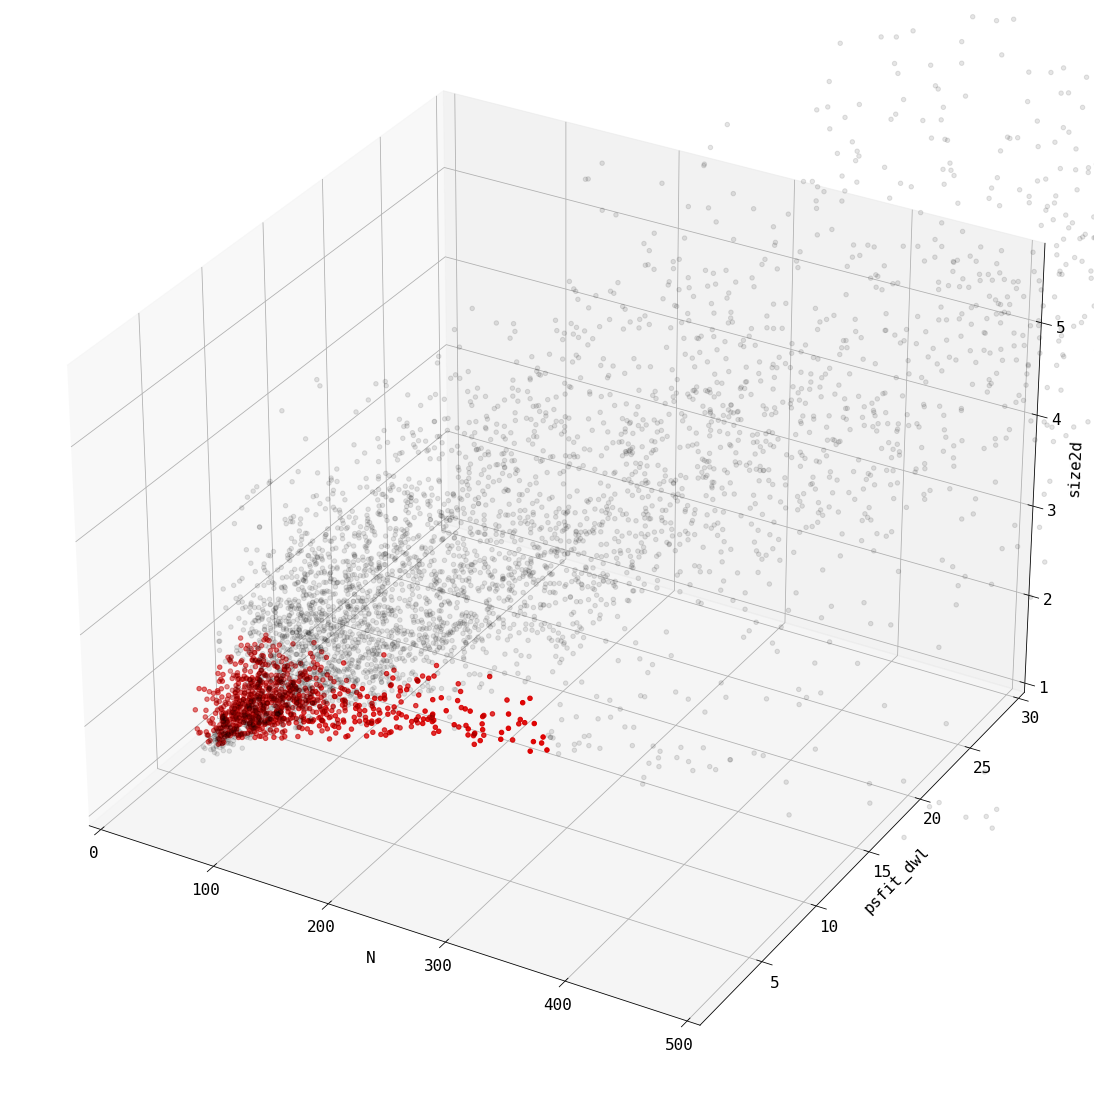

In [72]:
import matplotlib.pyplot as plt
import numpy as np
%matplotlib inline

# Fixing random state for reproducibility
#np.random.seed(19680801)


def randrange(n, vmin, vmax):
    """
    Helper function to make an array of random numbers having shape (n, )
    with each number distributed Uniform(vmin, vmax).
    """
    return (vmax - vmin)*np.random.rand(n) + vmin

fig = plt.figure(figsize=[20,20])
ax = fig.add_subplot(projection='3d')

n = 100

## For each set of style and range settings, plot n random points in the box
### defined by x in [23, 32], y in [0, 100], z in [zlow, zhigh].
#for m, zlow, zhigh in [('o', -50, -25), ('^', -30, -5)]:
#    xs = randrange(n, 23, 32)
#    ys = randrange(n, 0, 100)
#    zs = randrange(n, zlow, zhigh)
#    ax.scatter(xs, ys, zs, marker=m)

xs = t["N"]
ys = np.abs(t["psfit_dwl"])
zs = t["size2d"]

ax.scatter(xs[jj], ys[jj], zs[jj], alpha=.1)
ax.scatter(xs[jj][ll], ys[jj][ll], zs[jj][ll], color='r')

ax.set_xlabel('N')
ax.set_ylabel('psfit_dwl')
ax.set_zlabel('size2d')

plt.xlim([0.,500.])
plt.ylim([0.1,1000.])
plt.ylim([0.1,30.])
plt.show()

(0.1, 30.0)

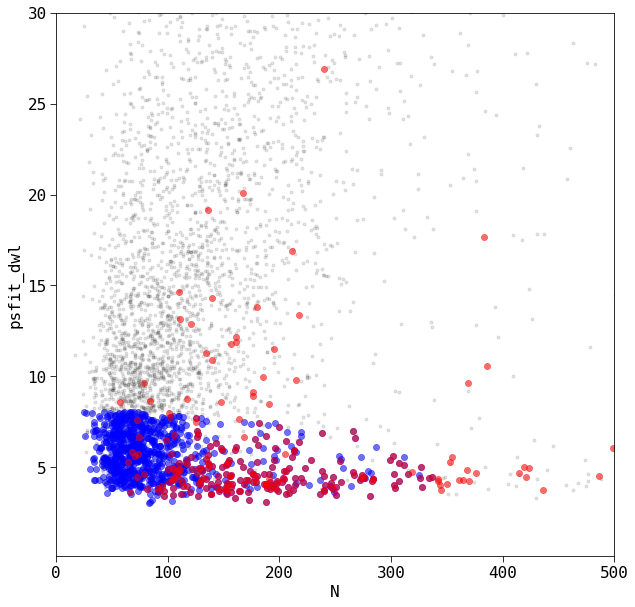

In [73]:
f = plt.figure(figsize=[10,10])
plt.plot(t["N"][jj], np.abs(t["psfit_dwl"][jj]),'.',alpha=.1)
plt.plot(t["N"][jj][ll], np.abs(t["psfit_dwl"][jj][ll]),'bo',alpha=.5)
plt.plot(t["N"][kk], np.abs(t["psfit_dwl"][kk]),'ro',alpha=.5)


plt.xlabel('N')
plt.ylabel('psfit_dwl')
plt.xlim([0.,500.])
plt.ylim([0.1,30.])


(1.0, 3.0)

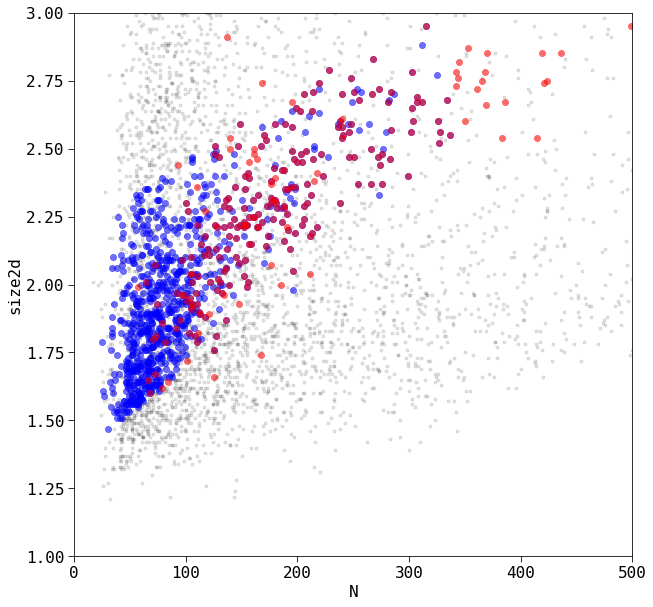

In [74]:
f = plt.figure(figsize=[10,10])
plt.plot(t["N"][jj], np.abs(t["size2d"][jj]),'.',alpha=.1)
plt.plot(t["N"][jj][ll], np.abs(t["size2d"][jj][ll]),'bo',alpha=.5)
plt.plot(t["N"][kk], np.abs(t["size2d"][kk]),'ro',alpha=.5)


plt.xlabel('N')
plt.ylabel('size2d')
plt.xlim([0.,500.])
plt.ylim([1.,3.])

(array([186., 164.,  52.,  31.,  31.,  22.,  23.,  17.,  23.,  19.,   8.,
         14.,  15.,   5.,   7.,   9.,   5.,   9.,   4.,   7.,   1.,   5.,
          2.,   5.,   2.,   6.,   2.,   2.,   4.,   0.,   7.,   2.,   2.,
          2.,   2.,   1.,   1.,   0.,   1.,   1.,   1.,   1.,   2.,   2.,
          1.,   2.,   2.,   2.,   1.]),
 array([  0.,  10.,  20.,  30.,  40.,  50.,  60.,  70.,  80.,  90., 100.,
        110., 120., 130., 140., 150., 160., 170., 180., 190., 200., 210.,
        220., 230., 240., 250., 260., 270., 280., 290., 300., 310., 320.,
        330., 340., 350., 360., 370., 380., 390., 400., 410., 420., 430.,
        440., 450., 460., 470., 480., 490.]),
 <BarContainer object of 49 artists>)

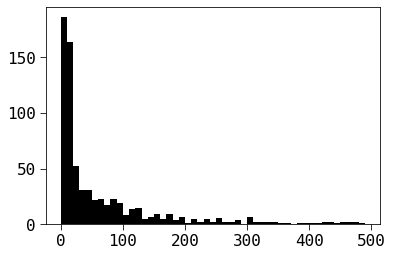

In [75]:
plt.hist( t['match1_psfit_EQW_lya'][jj][ll], bins=np.arange(0., 500., 10.) )

In [76]:
#xs = t["N"]
#ys = np.abs(t["psfit_dwl"])
#zs = t["size2d"]

In [85]:
pca.components_[0], pca.components_[1], pca.components_[2]

(array([ 0.99998526, -0.00466348,  0.00278147]),
 array([0.00464464, 0.99996647, 0.0067447 ]),
 array([-0.00281283, -0.00673169,  0.99997339]))

(1.2, 3.3)

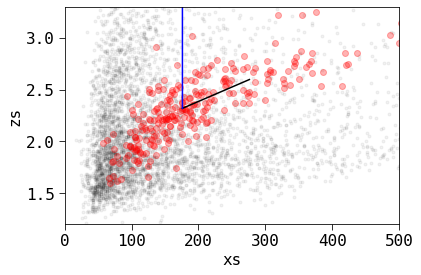

In [102]:
plt.plot(xs[~kk],zs[~kk],'k.', alpha=.05)
plt.plot(xs[kk],zs[kk],'ro', alpha=.3)
mnxs, mnzs = np.median(xs[kk]), np.median(zs[kk])
plt.plot( [mnxs, mnxs+pca.components_[0][0]*100], [mnzs ,mnzs + pca.components_[0][2]*100] )
#plt.plot( [mnxs, mnxs+pca.components_[1][0]*100], [mnzs ,mnzs + pca.components_[1][2]*100] )
#plt.plot( [mnxs, mnxs+pca.components_[1][0]*100], [mnzs ,mnzs + pca.components_[1][2]*100] )
plt.plot( [mnxs, mnxs+pca.components_[2][0]*100], [mnzs ,mnzs + pca.components_[2][2]*100] )
#plt.plot( [np.mean(xs[kk]), np.mean(xs[kk])+pca.components_[2][0]*100],[np.mean(zs[kk]),pca.components_[2][2]*100] )
#plt.arrow( np.mean(xs[kk]),np.mean(zs[kk]), pca.components_[1][0]*100, pca.components_[1][1]*100 )


plt.xlabel("xs")
plt.ylabel("zs")
#plt.axis('equal')

plt.xlim([0.,500.])
plt.ylim([1.2,3.3])

In [59]:
pca.components_

array([[ 0.99998526, -0.00466348,  0.00278147],
       [ 0.00464464,  0.99996647,  0.0067447 ],
       [-0.00281283, -0.00673169,  0.99997339]])

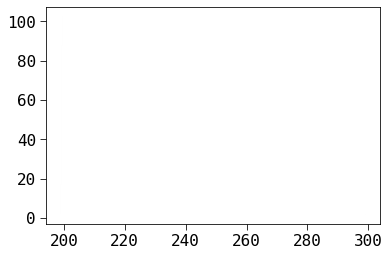

In [45]:
plt.arrow( np.mean(xs[kk]),np.mean(zs[kk]), pca.components_[0][0]*100, pca.components_[0][1]*100 , lw=10)
plt.arrow( np.mean(xs[kk]),np.mean(zs[kk]), pca.components_[1][0]*100, pca.components_[1][1]*100 , lw=10)


In [27]:
1/0

ZeroDivisionError: division by zero

# PCA tests

In [ ]:
xs = np.arange(10,100,1.)
ys = 1.*xs
zs = 0.*xs
xs += np.random.normal(size=len(xs),scale=1.)
ys += np.random.normal(size=len(ys),scale=1.)
zs += np.random.normal(size=len(zs),scale=1.)

from sklearn.decomposition import PCA

n_components = 3
pca = PCA(n_components=n_components)
M = np.array( [xs[kk], ys[kk], zs[kk]]).T
pca.fit( M )


print(pca.explained_variance_ratio_)
print(pca.singular_values_)

pca.components_[0] , pca.components_[1] , pca.components_[2] 

from astropy.stats import biweight_location, biweight_midvariance

ranges = []
kappa = 2.
for i in range(n_components):
    
    P = M.dot( pca.components_[i] )
    x, dx = biweight_location(P), np.sqrt((biweight_midvariance(P)))
    vmin, vmax = np.min(P), np.max(P)
    print("c {:.2f}: min = {:.2f} max = {:.2f} biweight_loc = {:.2f} biweight_midvariance = {:.2f}".format(i, vmin, vmax, x, dx) )
    ranges.append( [x-kappa*dx, x+kappa*dx])
    

# OLD featrue importance examples

In [ ]:
#EXAMPLES 


# test classification dataset
from sklearn.datasets import make_classification
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)


# test regression dataset
from sklearn.datasets import make_regression
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# summarize the dataset
print(X.shape, y.shape)

# linear regression feature importance
from sklearn.datasets import make_regression
from sklearn.linear_model import LinearRegression
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = LinearRegression()
# fit the model
model.fit(X, y)
# get importance
importance = model.coef_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# decision tree for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.tree import DecisionTreeRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = DecisionTreeRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# decision tree for feature importance on a classification problem
from sklearn.datasets import make_classification
from sklearn.tree import DecisionTreeClassifier
from matplotlib import pyplot
# define dataset
X, y = make_classification(n_samples=1000, n_features=10, n_informative=5, n_redundant=5, random_state=1)
# define the model
model = DecisionTreeClassifier()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

# random forest for feature importance on a regression problem
from sklearn.datasets import make_regression
from sklearn.ensemble import RandomForestRegressor
from matplotlib import pyplot
# define dataset
X, y = make_regression(n_samples=1000, n_features=10, n_informative=5, random_state=1)
# define the model
model = RandomForestRegressor()
# fit the model
model.fit(X, y)
# get importance
importance = model.feature_importances_
# summarize feature importance
for i,v in enumerate(importance):
	print('Feature: %0d, Score: %.5f' % (i,v))
# plot feature importance
pyplot.bar([x for x in range(len(importance))], importance)
pyplot.show()

In [ ]:
np.nans